### Exercício 4

#### Pratica 1 -  Dataset 2D (datasets/2d_dataset.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Importe as bibliotecas necessárias para analise dos dados
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset.csv')
```
3. Treine modelos, através da abordagem de holdout, de:
    1. kNN (efetuando as etapas de preprocessamento necessárias e a devida otimização de parametros, k entre 10 a 100)
    3. Random Forest (efetuando as etapas de preprocessamento necessárias e a devida otimização de parametros)
4. Compare os classificadores através da curva ROC e AUC

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc

from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
df = pd.read_csv('datasets/2d_dataset.csv')

In [19]:
df.describe()

,y,alpha,beta
count,2994.000000,2994.000000,2994.000000
mean,0.656981,500.917502,501.393454
std,0.474797,289.387318,286.933215
min,0.000000,0.000000,0.000000
25%,0.000000,248.000000,256.000000
50%,1.000000,505.500000,499.000000
75%,1.000000,755.000000,749.000000
max,1.000000,998.000000,999.000000


In [20]:
label = np.array(df.y)
features = np.array(df.drop(['y'], axis = 1))

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizado = scaler.transform(features)

In [21]:
trainFeatures, testeFeatures, trainLabel, testLabel = train_test_split(featuresNormalizado, label, train_size = 0.7, random_state = 42)

In [22]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(trainFeatures, trainLabel)

RandomForestClassifier()

In [23]:
predictProbaForest = forest.predict_proba(testeFeatures)

In [25]:
fprForest, tprForest, limiarForest = roc_curve(testLabel, predictProbaForest[:,1], pos_label=1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(trainFeatures, trainLabel)

KNeighborsClassifier(n_neighbors=10)

In [28]:
predictProbaKnn = knn.predict_proba(testeFeatures)

In [29]:
fprKnn, tprKnn, limiarKnn = roc_curve(testLabel, predictProbaKnn[:,1], pos_label=1)

In [48]:
tree = DecisionTreeClassifier(min_samples_leaf = 100)
tree.fit(trainFeatures, trainLabel)

DecisionTreeClassifier(min_samples_leaf=100)

In [49]:
predictProbaTree = tree.predict_proba(testeFeatures)

In [50]:
fprTree, tprTree, limiarTree = roc_curve(testLabel, predictProbaTree[:,1], pos_label=1)

Text(0, 0.5, 'Tpr')

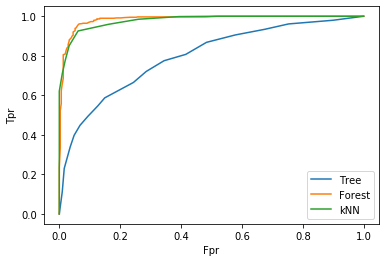

In [51]:
plt.plot(fprTree, tprTree)
plt.plot(fprForest, tprForest)
plt.plot(fprKnn, tprKnn)
plt.legend(['Tree', 'Forest', 'kNN'])
plt.xlabel('Fpr')
plt.ylabel('Tpr')

In [52]:
set(limiarTree)

{0.16901408450704225,
 0.2358490566037736,
 0.37,
 0.3902439024390244,
 0.4230769230769231,
 0.55,
 0.5544554455445545,
 0.68,
 0.6916666666666667,
 0.7,
 0.75,
 0.78,
 0.7920792079207921,
 0.8543689320388349,
 0.9,
 0.9302325581395349,
 0.9553072625698324,
 0.9606299212598425,
 1.9606299212598426}

In [56]:
auc(fprForest, tprForest),auc(fprTree, tprTree),auc(fprKnn, tprKnn)

(0.9843375744390972, 0.7960313797877251, 0.978808205331048)

#### Pratica 2 -  Dataset Titanic (datasets/titanic.csv)

#### Descricao

Problema

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Atributos

- survival (0 = No, 1 = Yes)
- pclas: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex	
- sibsp: # of siblings / spouses aboard the Titanic	
- parch: # of parents / children aboard the Titanic	
- ticket: Ticket number	
- fare: Passenger fare	
- cabin: Cabin number	
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização e determine o melhor classificador

In [78]:
dfTitanic = pd.read_csv('datasets/titanic.csv')

In [79]:
dfTitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [80]:
dfTitanic = dfTitanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [81]:
dfTitanic.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [82]:
dfNumerico = pd.get_dummies(dfTitanic, prefix_sep='_', drop_first=True)

In [83]:
dfNumerico.describe()

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [84]:
features = np.array(dfNumerico.drop(['Survived'], axis = 1))
label = np.array(dfNumerico.Survived)

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [85]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [95]:
listaErroTreino = []
listaErroTeste = []

for i in range(200,1,-2):
    tree = DecisionTreeClassifier(min_samples_split= i)
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTreino = tree.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = tree.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

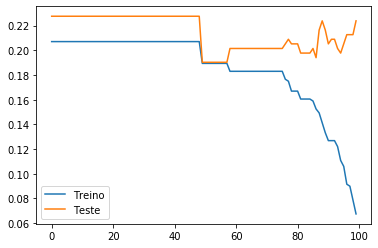

In [103]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [115]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#58

In [ ]:
tree = DecisionTreeClassifier(min_samples_split= 58)
tree.fit(featuresTreino, labelTreino)
predictProbaTree = tree.predict_proba(featuresTeste)

fprTree, tprTree, limiarTree = roc_curve(labelTeste, predictProbaTree[:,1], pos_label=1)

In [116]:
listaErroTreino = []
listaErroTeste = []

for i in range(1,200,2):
    forest = RandomForestClassifier(n_estimators = i)
    forest.fit(featuresTreino, labelTreino)
    
    predicaoTreino = forest.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = forest.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

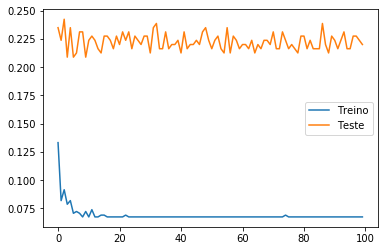

In [118]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [121]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#4    

In [122]:
forest = RandomForestClassifier(min_samples_split= 4)
forest.fit(featuresTreino, labelTreino)
predictProbaForest = forest.predict_proba(featuresTeste)

fprForest, tprForest, limiarForest = roc_curve(labelTeste, predictProbaForest[:,1], pos_label=1)

In [124]:
listaAccTreino = []
listaAccTeste = []

for neighbor in range(5,100,1):
       
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(featuresTreino, labelTreino)
    
    predicaoKnnTreino = knn.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoKnnTreino)
    
    predicaoKnnTeste = knn.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoKnnTeste)
    
    listaAccTreino.append(1-accTreino)
    listaAccTeste.append(1-accTeste)
    

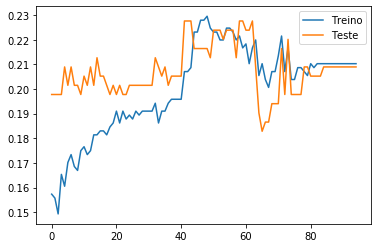

In [127]:
plt.plot(listaAccTreino)
plt.plot(listaAccTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [130]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#65   

In [131]:
kNN = KNeighborsClassifier(n_neighbors = 65)
kNN.fit(featuresTreino, labelTreino)
predictProbaKNN = kNN.predict_proba(featuresTeste)

fprKnn, tprKnn, limiarKnn = roc_curve(labelTeste, predictProbaKNN[:,1], pos_label=1)

Text(0, 0.5, 'Tpr')

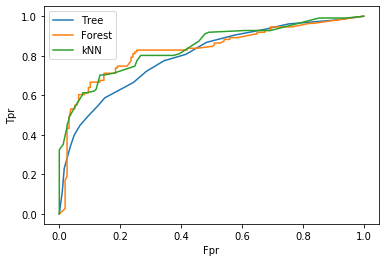

In [133]:
plt.plot(fprTree, tprTree)
plt.plot(fprForest, tprForest)
plt.plot(fprKnn, tprKnn)
plt.legend(['Tree', 'Forest', 'kNN'])
plt.xlabel('Fpr')
plt.ylabel('Tpr')

In [134]:
auc(fprForest, tprForest),auc(fprTree, tprTree),auc(fprKnn, tprKnn)

(0.8293739599472083, 0.7960313797877251, 0.8415676823320136)

####  Pratica 3 -  Detecção de Emprestimo Bancário (datasets/loan.csv)

#### Descricao

Problema

The classification goal is to predict the likelihood of a liability customer buying personal loans.

Atributos

- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer
- Family : Family size of the customer
- Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage : Value of house mortgage if any.
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by
- class: made loan (0=no, 1=yes)

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para detecção do dígito de empréstimos

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [63]:
df = pd.read_csv("datasets/loan.csv")

In [64]:
df.describe()

,Age,Experience,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,1.147663,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [65]:
label = np.array(df['class'])
df = df.drop(['class'], axis = 1)

In [66]:
features = np.array(df)

In [67]:
scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [68]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [43]:
listaErroTreino = []
listaErroTeste =[]

for i in range(200,1,-20):
    # i =Quantos parâmetros ele precisa ver em cada folha, 
    #quanto maior, mais 'overfitting' pode acontecer
    
    tree = DecisionTreeClassifier(min_samples_split= i)
    tree.fit(featuresTreino, labelTreino)

    predicaoTreino = tree.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    erroTreino = (1 - accTreino)
    
    predicaoTeste = tree.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    erroTeste =(1- accTeste)
    
    #listaErroTreino.append(predicaoTreino)
    listaErroTreino.append(erroTreino)
    
    #listaErroTeste.append(predicaoTeste)
    listaErroTeste.append(erroTeste)  

In [44]:
listaErroTreino

[0.18925813803190583,
 0.1788156059729923,
 0.17425762781046972,
 0.1633729038402667,
 0.15609374468519333,
 0.1463315078744175,
 0.13333786863498753,
 0.11918772747372364,
 0.0985407666927447,
 0.06792748052654851]

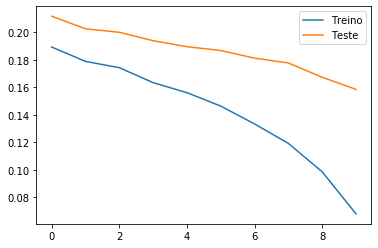

In [45]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [73]:
tree = DecisionTreeClassifier()
tree.fit(featuresTreino, labelTreino)

DecisionTreeClassifier()

In [74]:
predicaoTeste = tree.predict(featuresTeste)

matrix = confusion_matrix(labelTeste, predicaoTeste)

tpr = matrix[0][0] / matrix[0].sum()
fnr = matrix[0][1] / matrix[0].sum()
tnr = matrix[1][1] / matrix[1].sum()
fpr = matrix[1][0] / matrix[1].sum()

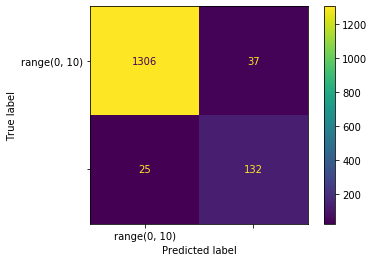

In [75]:
ConfusionMatrixDisplay(confusion_matrix(labelTeste, predicaoTeste), display_labels=[range(0,10)]).plot(values_format= 'd')

In [ ]:
#"Confianças"
predictTreeProba = tree.predict_proba(featuresTeste)

#Confiança da primeira instância
#tree.predict_proba(featuresTeste)[0]

In [ ]:
"pos_label =  classe de 'interesse'"
fprTree, tprTree, limiarTree = roc_curve(labelTeste, predictTreeProba[:,3], pos_label=3)

In [ ]:
plt.plot(fprTree, tprTree)
plt.legend(['Decision Tree'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#Limiar = qual é a fronteira de decisão usada pelo classificador
set(limiarTree)

In [ ]:
auc(fprTree, tprTree)

####  Pratica 4 -  Detecção de Números (datasets/digit.csv)

#### Descricao

Problema

Detecção de imagens com números (0 a 9) escritos a mão.

Atributos

- Label (0,1,2,3,4,5,6,7,8,9)
- pixel0
- pixel1
- ...
- pixel783

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para detecção dos números
    - O melhor classificador para detecção do dígito '3'